In [1]:
# import helper function
import pandas as pd
import numpy as np
from sklearn.utils import resample
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [36]:
# prepare the data
def create_dataset(data):
    dataX, dataY = [],[]
    for i in range(len(data)):
        dataX.append(data[i][1:-1])
        dataY.append(data[i][-1])
        
    return np.array(dataX), np.array(dataY)

def evaluate_case(data, eva_model):
    evaluate_cases = {}
    for i in range(eva_model):
        dataY = [data[ii][-eva_model+i] for ii in range(len(data))]
        evaluate_cases[i] = dataY
        
    return evaluate_cases

# bootstrapping 
def bootstrap(dataset, sample_size):
    
    sample_size = int(len(train)*0.8)
    boot = resample(train, replace=True, n_samples=sample_size, random_state=2)
    
    return boot

# Mean Absolute Percentage Error
def mean_absolute_percentage_error(data_true, data_predict):
    error = 0
    count = 0
    data_true_de = sum(data_true)/len(data_true)
    
    for i in range(len(data_true)):
        error += np.abs((data_true[i]-data_predict[i])/data_true_de)

    return((error/len(data_true))*100)

# regression models plot
def regression_predict(model, trainX, trainY, testX, testY):
    
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    score = mean_absolute_percentage_error(testY, predictions)
    plt.figure(figsize=(20,10))
    plt.plot(testY)
    plt.plot(predictions)
    plt.ylim([0, 1])
    plt.legend(["Output to Predict", "Prediction"])
    
    plt.xlabel("Samples")
    plt.ylabel("Normalized Power Output")
    
    plt.show()
    
    return round(score,2)

In [55]:
# read the data
filename = "hour_data.csv"
dataset = pd.read_csv(filename)
dataset = dataset.dropna()
dataset = dataset.values

# normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

# prepare the data
train_test_ratio = 0.4
sample_size = 0.8
train_size = int(train_test_ratio*len(dataset))
train, test = dataset[:train_size], dataset[train_size:]

# bootstrapping 
train = bootstrap(train, sample_size)

# create train and test dataset
trainX, trainY = create_dataset(train)
testX, testY = create_dataset(test)

# # exclude numbers of panels (2 normal + 2 anormaly) from training
# exclude = 2
# evaluateY = evaluate_case(test, exclude)
# # evaluateY = [test[i][exclude] for i in range(len(test))]

# # create train and test dataset
# trainX, trainY = create_dataset(train, exclude)
# testX, testY = create_dataset(test, exclude)

# store the score
scores = {"NA":0, "KNN":0, "DT":0, "RF":0}

## Naive Approach (Average) 

Text(0.5, 1.0, 'West Roof: Naive Approach (average) with MAPE of 11.59%')

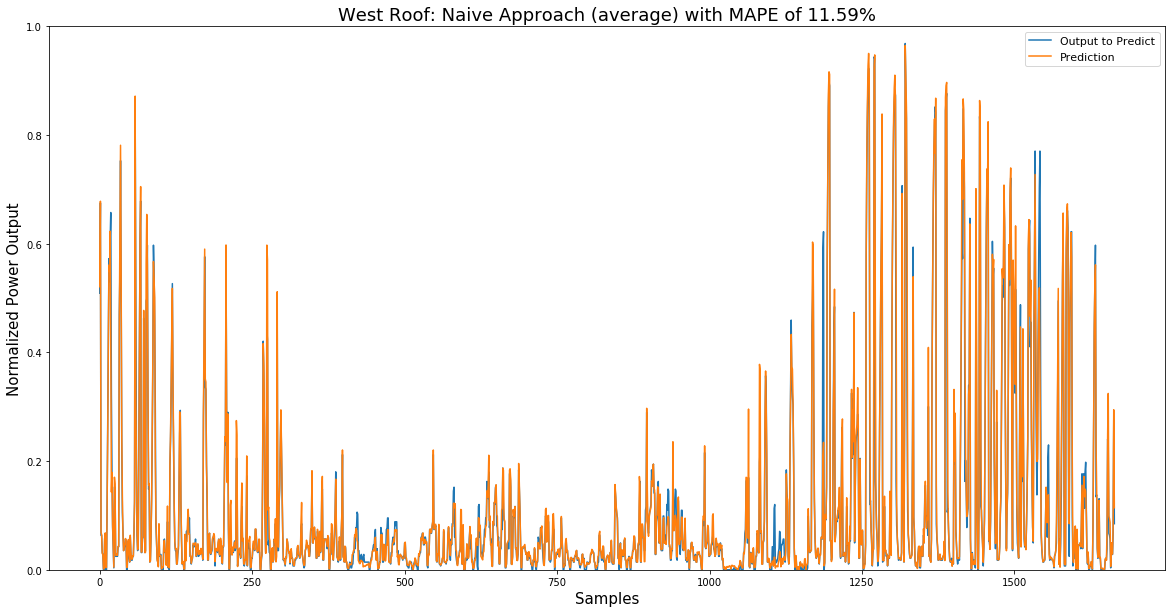

In [65]:
predictions = [np.mean(i) for i in testX]
score = mean_absolute_percentage_error(testY, predictions)
scores["NA"] = score

plt.figure(figsize=(20,10))
plt.plot(testY)
plt.plot(predictions)
plt.ylim([0, 1])
plt.legend(["Output to Predict", "Prediction"], fontsize=11)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Normalized Power Output", fontsize=15)
plt.title("West Roof: Naive Approach (average) with MAPE of " + str(format(round(score,2))) + "%", fontsize=18)

# for i in evaluateY:
#     a = mean_absolute_percentage_error(evaluateY[i], predictions)
# #     a = mean_absolute_error(evaluateY[i], predictions)
#     print(a)

# plt.savefig('Naive Approach.eps', format='eps', dpi=1000)

## K-NN Regressor 

Text(0.5, 1.0, 'K-NN regression model with MAPE of 9.08%')

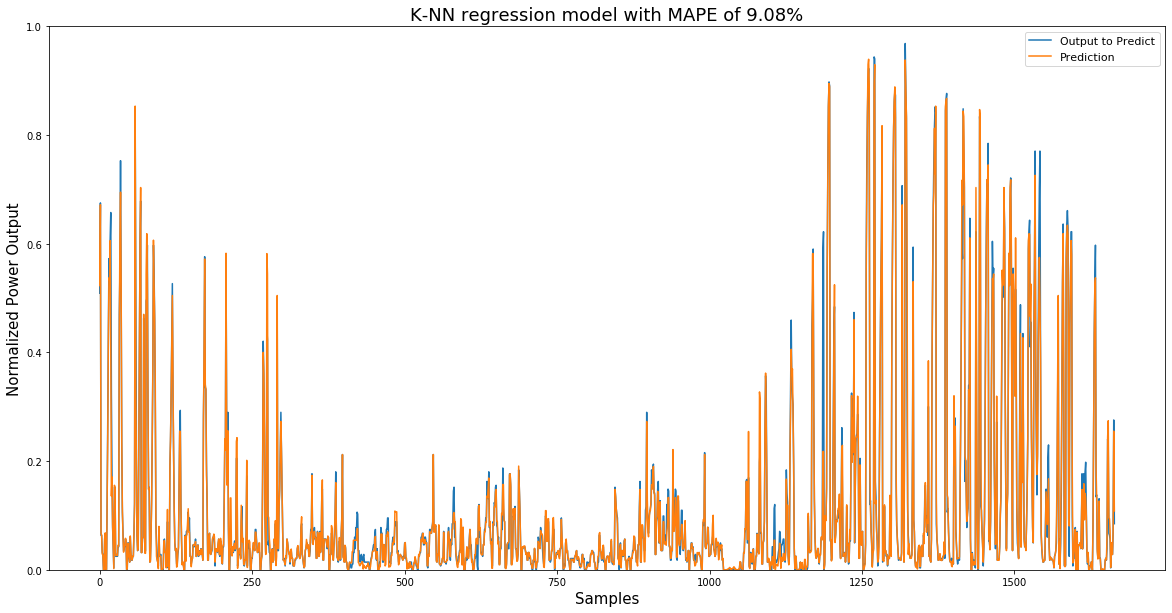

In [57]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(trainX, trainY)
predictions = model.predict(testX)
score = mean_absolute_percentage_error(testY, predictions)
scores["KNN"] = score

plt.figure(figsize=(20,10))
plt.plot(testY)
plt.plot(predictions)
plt.ylim([0, 1])
plt.legend(["Output to Predict", "Prediction"], fontsize=11)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Normalized Power Output", fontsize=15)
plt.title("K-NN regression model with MAPE of " + str(format(round(score,2))) + "%", fontsize=18)

# for i in evaluateY:
#     a = mean_absolute_percentage_error(evaluateY[i], predictions)
# #     a = mean_absolute_error(evaluateY[i], predictions)
#     print(a)

# plt.savefig('K-NN.eps', format='eps', dpi=1000)

## Decision Tree Regressor 

Text(0.5, 1.0, 'Decision Tree regression model with MAPE of 9.5%')

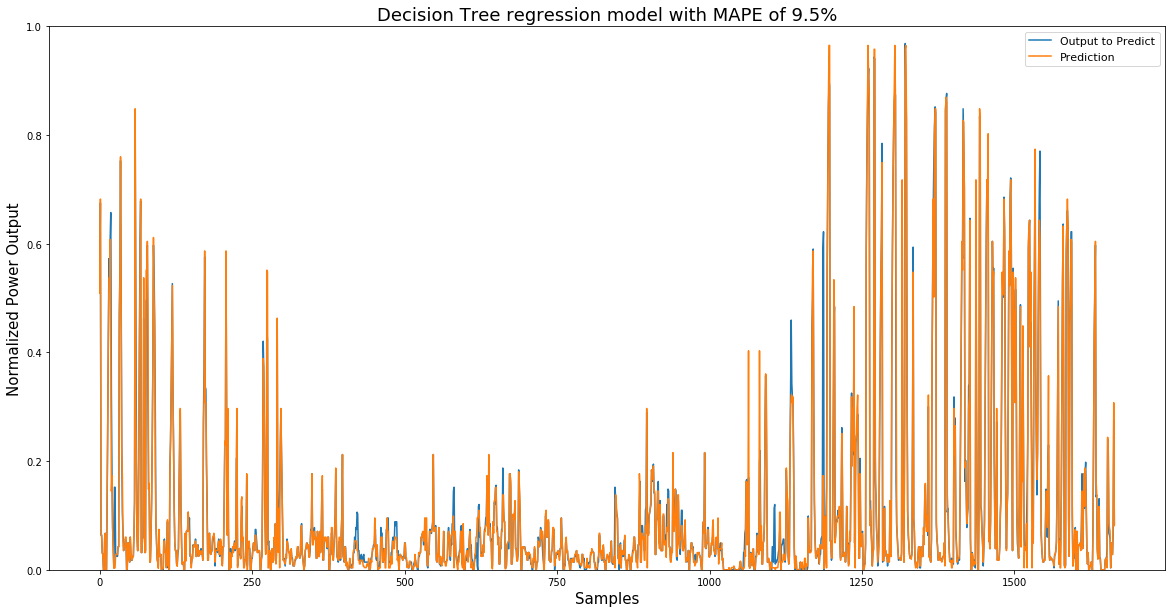

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(trainX, trainY)
predictions = model.predict(testX)
score = mean_absolute_percentage_error(testY, predictions)
scores["DT"] = score

plt.figure(figsize=(20,10))
plt.plot(testY)
plt.plot(predictions)
plt.ylim([0, 1])
plt.legend(["Output to Predict", "Prediction"], fontsize=11)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Normalized Power Output", fontsize=15)
plt.title("Decision Tree regression model with MAPE of " + str(format(round(score,2))) + "%", fontsize=18)

# for i in evaluateY:
#     a = mean_absolute_percentage_error(evaluateY[i], predictions)
# #     a = mean_absolute_error(evaluateY[i], predictions)
#     print(a)

# plt.savefig('DT.eps', format='eps', dpi=1000)

## Random Forest Regressor 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


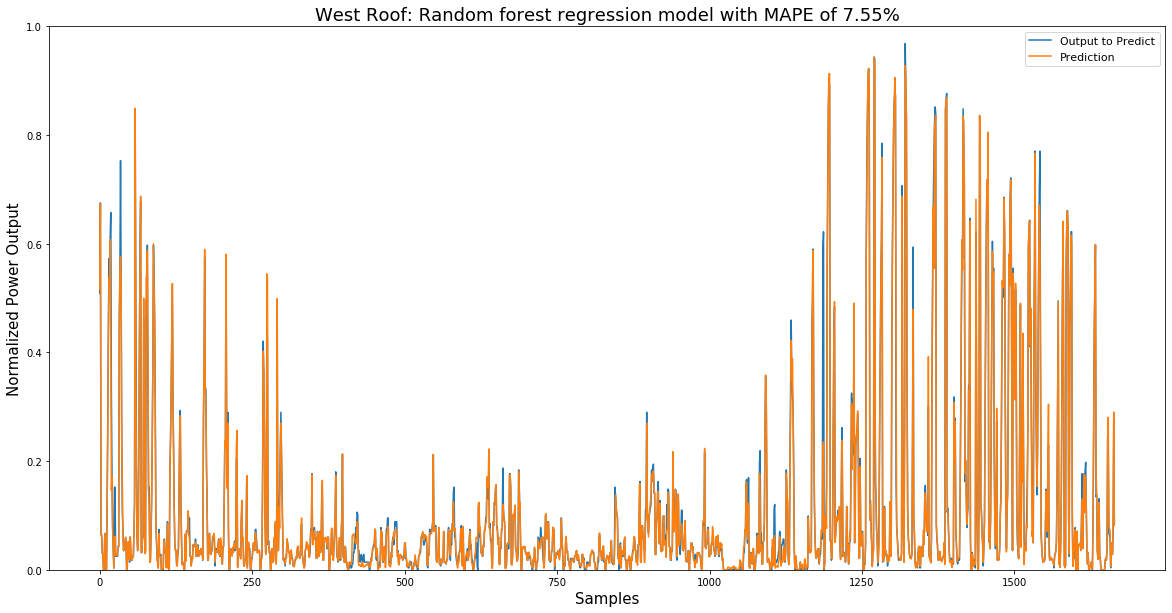

In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(trainX, trainY)
predictions = model.predict(testX)
score = mean_absolute_percentage_error(testY, predictions)
scores["RF"] = score

plt.figure(figsize=(20,10))
plt.plot(testY)
plt.plot(predictions)
plt.ylim([0, 1])
plt.legend(["Output to Predict", "Prediction"], fontsize=11)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Normalized Power Output", fontsize=15)
plt.title("West Roof: Random forest regression model with MAPE of " + str(format(round(score,2))) + "%", fontsize=18)

# for i in evaluateY:
#     a = mean_absolute_percentage_error(evaluateY[i], predictions)
# #     a = mean_absolute_error(evaluateY[i], predictions)
#     print(a)

# plt.savefig('Random forest.eps', format='eps', dpi=1000)